In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait

In [5]:
# Set up Chrome options
chrome_options = Options()
chrome_options.page_load_strategy = 'normal'

In [12]:
# Set up the Chrome driver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)
driver.set_page_load_timeout(30)

page_url = 'https://www.southperry.net/showthread.php?t=82643'
try:
    driver.get(page_url)
except TimeoutException:
    print("The page took too long to load!")

In [202]:
post_options = driver.find_elements(By.CLASS_NAME, "spoiler")


In [176]:
len(inner_content_elements)

129

In [204]:
import pandas as pd  # Import pandas

# Initialize a list to store data
data = []

# Loop through the options
for option in post_options:
    if option.text in ['Epic Options (129 Lines)', 'Unique Options (150 Lines)']:
        show_button = option.find_element(By.XPATH, ".//input[@type='button' and @value='Show']")
        show_button.click()
        
        time.sleep(1)  # Wait for the content to expand

        # Get the inner content elements
        inner_content_elements = option.find_elements(By.CLASS_NAME, "spoiler")
        
        # Extract text from the inner content elements
        inner_content_texts = [element.text for element in inner_content_elements]
        
        # Loop through each inner content element
        for elem, inner_content_text in zip(inner_content_elements, inner_content_texts):
            show_button2 = elem.find_element(By.XPATH, ".//input[@type='button' and @value='Show']")
            show_button2.click()

            # Find the final content within this inner content
            final_content_elements = elem.find_elements(By.CLASS_NAME, 'inner')
            
            # Extract text from the final content elements
            final_content_texts = [element.text for element in final_content_elements]

            # For each final content, add a row to data
            for final_text in final_content_texts:
                data.append({
                    'Option': option.text,
                    'Inner Content Text': inner_content_text,
                    'Final Content Text': final_text
                })

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df.head()


,Option,Inner Content Text,Final Content Text
0,Epic Options (129 Lines)\n\n#prop% chance to A...,#prop% chance to Auto Steal,Weight: 5 (0.367%)\n1 1% chance to Auto Steal\...
1,Epic Options (129 Lines)\n\n#prop% chance to A...,#prop% chance to Auto Steal,Weight: 5 (0.367%)\n1 2% chance to Auto Steal\...
2,Epic Options (129 Lines)\n\n#prop% chance to A...,#prop% chance to become invincible for #time s...,Weight: 5 (0.367%)\n1 2% chance to become invi...
3,Epic Options (129 Lines)\n\n#prop% chance to A...,ATT: +#incPAD,Weight: 15 (1.101%)\n1 ATT: +6\n2 ATT: +6\n3 A...
4,Epic Options (129 Lines)\n\n#prop% chance to A...,ATT: +#incPAD,Weight: 15 (1.101%)\n1 ATT: +5\n2 ATT: +5\n3 A...


In [386]:
df.shape

(279, 4)

# Cleaning Data

In [207]:
import re

In [426]:
df = df[~df.duplicated()].reset_index(drop=True).copy()

In [270]:
df['Option'] = np.where(df['Option'].str.contains('Epic'),'Epic','Unique')

In [278]:
df.columns = ['Tier','Potential','Weight']

In [438]:
df.head()

,Tier,Potential,Weight,Weight_val
0,Epic,#prop% chance to Auto Steal,Weight: 5 (0.367%)\n1 1% chance to Auto Steal\...,5
1,Epic,#prop% chance to Auto Steal,Weight: 5 (0.367%)\n1 2% chance to Auto Steal\...,5
2,Epic,#prop% chance to become invincible for #time s...,Weight: 5 (0.367%)\n1 2% chance to become invi...,5
3,Epic,ATT: +#incPAD,Weight: 15 (1.101%)\n1 ATT: +6\n2 ATT: +6\n3 A...,15
4,Epic,ATT: +#incPAD,Weight: 15 (1.101%)\n1 ATT: +5\n2 ATT: +5\n3 A...,15


In [320]:
df['Weight_val'] = df['Weight_val'].str.replace('Weight: ','').astype('int')

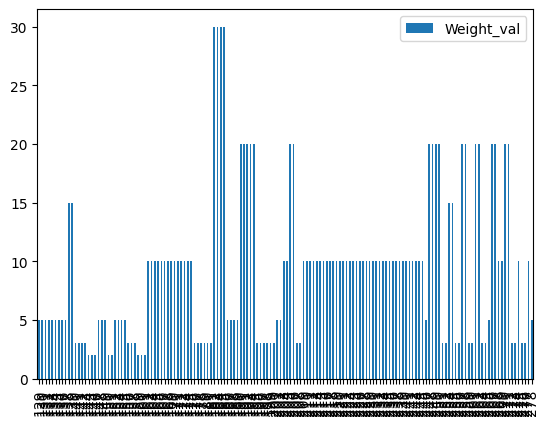

In [330]:
df.query("Tier == 'Unique'")[['Potential','Weight_val']].plot(kind='bar',y='Weight_val')
plt.show()

In [390]:
df['Tier'].value_counts()

Tier
Unique    150
Epic      129
Name: count, dtype: int64

In [344]:
df[df['Potential'].str.contains('Boss')]

,Tier,Potential,Weight,Weight_val
58,Epic,Damage to Bosses: +#incDAMr%,Weight: 2 (0.147%)\n1 Damage to Bosses: +20%\n...,2
59,Epic,Damage to Bosses: +#incDAMr%,Weight: 2 (0.147%)\n1 Damage to Bosses: +30%\n...,2
159,Unique,Boss Damage: +#incDAMr%,Weight: 2 (0.146%)\n1 Boss Damage: +30%\n2 Bos...,2
160,Unique,Boss Damage: +#incDAMr%,Weight: 2 (0.146%)\n1 Boss Damage: +35%\n2 Bos...,2
161,Unique,Boss Damage: +#incDAMr%,Weight: 2 (0.146%)\n1 Boss Damage: +40%\n2 Bos...,2


In [384]:
df['Weight_val'].value_counts()

Weight_val
10    121
3      47
5      43
20     39
2      13
15      8
30      8
Name: count, dtype: int64

In [432]:
group_df = df.groupby(['Tier','Potential'])['Weight_val'].sum().reset_index()

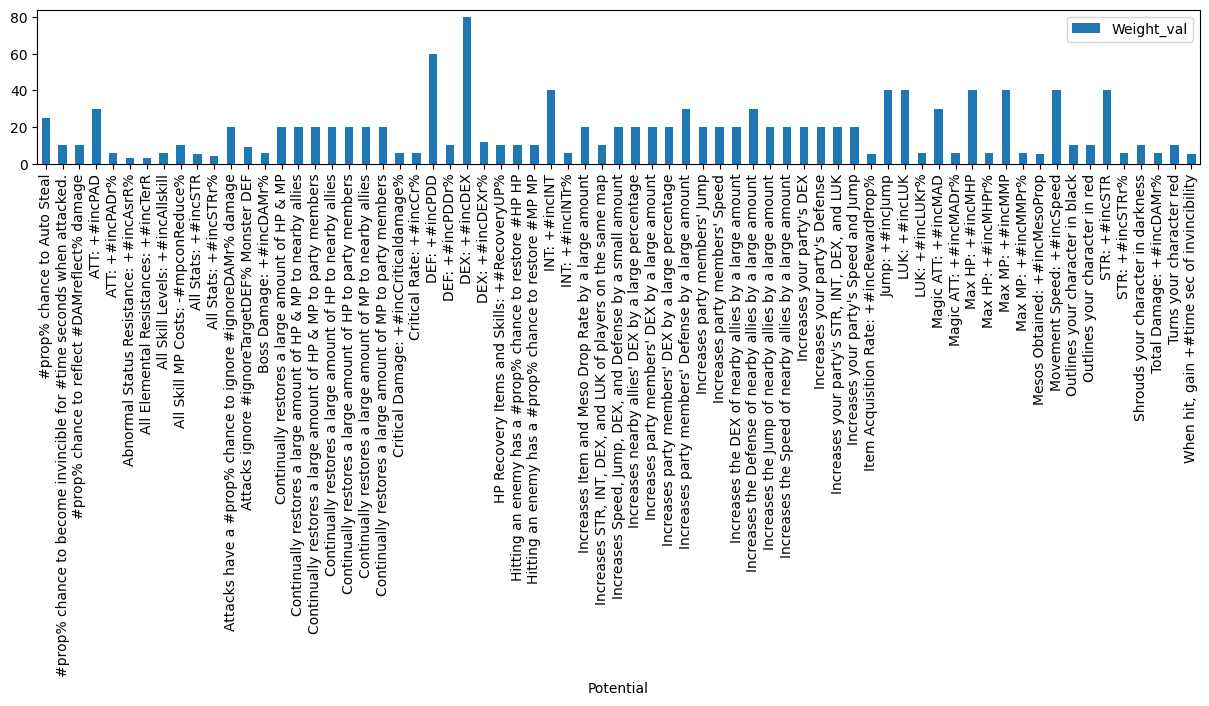

In [434]:
group_df.query("Tier =='Unique'").plot(kind='bar',x='Potential',y='Weight_val',figsize=(15,2))
plt.show()

In [446]:
df['Weight'].str.split('\n')[0]

['Weight: 5 (0.367%)',
 '1 1% chance to Auto Steal',
 '2 1% chance to Auto Steal',
 '3 1% chance to Auto Steal',
 '4 1% chance to Auto Steal',
 '5 1% chance to Auto Steal',
 '6 1% chance to Auto Steal',
 '7 1% chance to Auto Steal',
 '8 1% chance to Auto Steal',
 '9 1% chance to Auto Steal',
 '10 1% chance to Auto Steal',
 '11 1% chance to Auto Steal',
 '12 1% chance to Auto Steal',
 '13 1% chance to Auto Steal',
 '14 1% chance to Auto Steal',
 '15 1% chance to Auto Steal',
 '16 1% chance to Auto Steal',
 '17 1% chance to Auto Steal',
 '18 1% chance to Auto Steal',
 '19 1% chance to Auto Steal',
 '20 1% chance to Auto Steal']

In [392]:
df.to_csv('scraped_file.csv')